# Connectionist Neuron for binary classifiction


In this exercise we will classify apples and oranges using the connectionist neuron.

We will use Relu Activation in this task.





     x.1    x.2  y
0  0.365  0.708  0
1  0.543 -0.268  0
2 -0.401  0.643  0
3  0.866 -0.796  0
4 -0.386  0.742  0
x.1    0.252160
x.2    0.241115
y      0.500000
dtype: float64


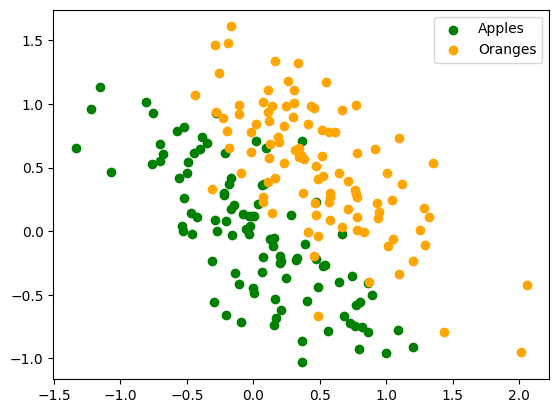

In [ ]:
'''
First vizualize the data
'''

import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('applesOranges.csv')
print(data.head())

apples = data[data["y"] ==  0]
oranges = data[data["y"] == 1]

plt.scatter(apples["x.1"], apples["x.2"], color="green", label="Apples")
plt.scatter(oranges["x.1"], oranges["x.2"], color="orange", label="Oranges")
plt.legend()


# Classification

We are gonna  construct us 19 different weight vectors $w_i = [w_1 , w_2]^T$ with $/gamma [0, .., 10, ..., 180]$




In [33]:
import numpy as np

angle = [x for x in range(0, 190, 10)]

coses = [float(np.cos(x)) for x in angle ]
sinuses = [float(np.sin(x)) for x in angle]

biases = [0] * len(angle)

w_vectors = [(coses[x], sinuses[x]) for x in range(len(coses))]

NUMBER_DATAPOINTS = len(data)

# relu funtion for activation -> this is for the conditional probability 
def activation(input : float) -> float:
     return 1 if input >= 0 else 0

# calc the Linear threshold
def classifier(weight_vector : np.ndarray, input_vector : np.ndarray, bias : np.ndarray ) -> int:
     return activation(float(np.dot(weight_vector.T, input_vector ) - bias))

def correctly_classified(output_neuron: int, correct_label) -> bool:
     return output_neuron == correct_label

def eval_weight_vector(weight_vector : np.ndarray, bias : np.ndarray) -> float:
     corr_counter = 0
     for index, row in data.iterrows():
          input_vector = np.array([row["x.1"], row["x.2"]])
          output_neuron = classifier(weight_vector=weight_vector, input_vector=input_vector, bias=bias)
          correct = correctly_classified(output_neuron=output_neuron, correct_label=row["y"])
          if correct:
               corr_counter += 1
     
     return corr_counter



Text(0, 0.5, 'accucary')

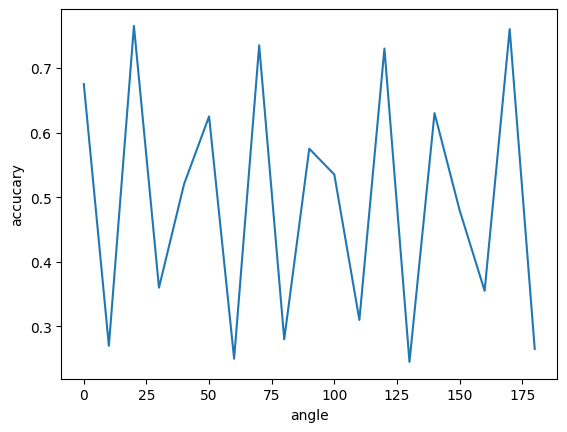

In [37]:
def test_all(weight_vectors : list[tuple[float, float]], biases) -> list[float]:
     result = []
     for x in range(len(weight_vectors)):
          result.append(eval_weight_vector(weight_vector=np.array(weight_vectors[x]),  bias=np.array(biases[x])))
     
     return [x / NUMBER_DATAPOINTS for x in result]

all_accuracies = test_all(weight_vectors=w_vectors, biases=biases)

plt.plot(angle, all_accuracies)
plt.xlabel("angle")
plt.ylabel("accucary")

In [40]:
# get best accuracy

best_acc_index = all_accuracies.index(min(all_accuracies))
best_vector = angle[best_acc_index]

# now with the bias additionally

biases_non_zero = [x * 0.1 for x in range(-30, 30)]
print(biases_non_zero)

#gives back the best bias
def test_non_zero_biases(biases_non_zero : list[float], weight_vector : tuple[float, float]) -> list[float]:
     result = []

     for x in range(len(biases_non_zero)):
          out = eval_weight_vector(weight_vector=np.array(weight_vector), bias=np.array(biases_non_zero[x]))
          result.append(out)
     
     return result

acc_with_non_zero_bias = test_non_zero_biases(biases_non_zero=biases_non_zero, weight_vector=best_vector)

best_bias_index = acc_with_non_zero_bias.index(min(acc_with_non_zero_bias))



[-3.0, -2.9000000000000004, -2.8000000000000003, -2.7, -2.6, -2.5, -2.4000000000000004, -2.3000000000000003, -2.2, -2.1, -2.0, -1.9000000000000001, -1.8, -1.7000000000000002, -1.6, -1.5, -1.4000000000000001, -1.3, -1.2000000000000002, -1.1, -1.0, -0.9, -0.8, -0.7000000000000001, -0.6000000000000001, -0.5, -0.4, -0.30000000000000004, -0.2, -0.1, 0.0, 0.1, 0.2, 0.30000000000000004, 0.4, 0.5, 0.6000000000000001, 0.7000000000000001, 0.8, 0.9, 1.0, 1.1, 1.2000000000000002, 1.3, 1.4000000000000001, 1.5, 1.6, 1.7000000000000002, 1.8, 1.9000000000000001, 2.0, 2.1, 2.2, 2.3000000000000003, 2.4000000000000004, 2.5, 2.6, 2.7, 2.8000000000000003, 2.9000000000000004]


TypeError: only length-1 arrays can be converted to Python scalars

In [35]:
#apply "best" classification to the dataset and write it to disk

def apply_classification(weight_vecor : tuple[float, float], best_bias):
     outputs = []
     original_data = pd.read_csv('applesOranges.csv')
     for index, row in original_data.iterrows():
          input_vector = np.array([row["x.1"], row["x.2"]])
          output_neuron = classifier(weight_vector=np.array(weight_vecor), input_vector=input_vector, bias=np.array(best_bias))
          outputs.append(output_neuron)
     
     transformed_df = original_data["out_classifier"] = outputs
     apples = transformed_df[transformed_df["out_classifier"]] == 0
     oranges = transformed_df[transformed_df["out_classifier"]] == 1
     
     plt.scatter(apples["x.1"], apples["x.2"], color="green", label="Apples")
     plt.scatter(oranges["x.1"], oranges["x.2"], color="orange", label="Oranges")
     plt.legend()

apply_classification(best_vector, biases_non_zero[best_bias_index])
     

     

     


NameError: name 'best_vector' is not defined

[0.10536051565782628, 0.2231435513142097, 0.35667494393873245, 0.5108256237659907, 0.6931471805599453, 0.916290731874155, 1.203972804325936, 1.6094379124341005, 2.302585092994046]
[2.3025850929940455, 1.6094379124341003, 1.2039728043259361, 0.916290731874155, 0.6931471805599453, 0.5108256237659907, 0.35667494393873245, 0.2231435513142097, 0.10536051565782628]


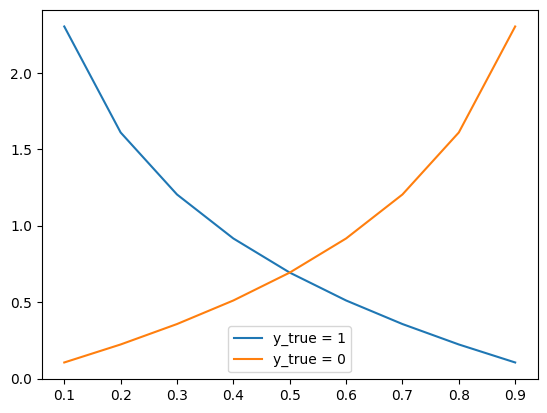

In [ ]:
# lets try to vizualize Binary cross entropy given different  outputs

def binary_cross_entropy(y_true, y_pred):
    bce = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    return bce

tests_1 = [
    # For 1
    (1, 0.9),
    (1, 0.8),
    (1, 0.7),
    (1, 0.6),
    (1, 0.5),
    (1, 0.4),
    (1, 0.3),
    (1, 0.2),
    (1, 0.1),
]
tests_0 = [
    (0, 0.9),
    (0, 0.8),
    (0, 0.7),
    (0, 0.6),
    (0, 0.5),
    (0, 0.4),
    (0, 0.3),
    (0, 0.2),
    (0, 0.1),
]


tests_0.reverse()
tests_1.reverse()
result_0 = []
result_1 = []
for x in range(len(tests_0)):
     res_0 = binary_cross_entropy(tests_0[x][0], tests_0[x][1])
     res_1 = binary_cross_entropy(tests_1[x][0], tests_1[x][1])
     result_0.append(float(res_0))
     result_1.append(float(res_1))


print(result_0)
print(result_1)

x_axis = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

plt.plot(x_axis,result_1, label="y_true = 1")
plt.plot(x_axis,result_0, label="y_true = 0")
plt.legend()
